# Analyzing CIA Factbook Data Using SQLite and Python

### Potencial Questions:
--Which countries have the highest population density?
--Which countries have the highest ratios of water to land? Which countries have more water than land?

## Introduction to dataset:

In [3]:
import pandas as pd
import sqlite3
conn=sqlite3.connect("factbook.db")
cursor = conn.cursor()
q2 = "select * from facts limit 5"
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


#### Finding min,max of population and population growth

In [18]:
q3="SELECT MIN(population),MAX(population),MIN(population_growth),MAX(population_growth) from facts"
pd.read_sql_query(q3,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


#### Finding a country whose popoulation is zero

In [4]:
q4="SELECT name from facts WHERE population=0"
pd.read_sql_query(q4,conn)

,name
0,Antarctica


### Findings:
Antarctica do not have permanent population,people arrange summer and winter camps there for research.

### Population of world

In [5]:
q5="SELECT name from facts WHERE population=7256490011"
pd.read_sql_query(q5,conn)

,name
0,World


### Generating histograms:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000213D9EB3BE0>], dtype=object)

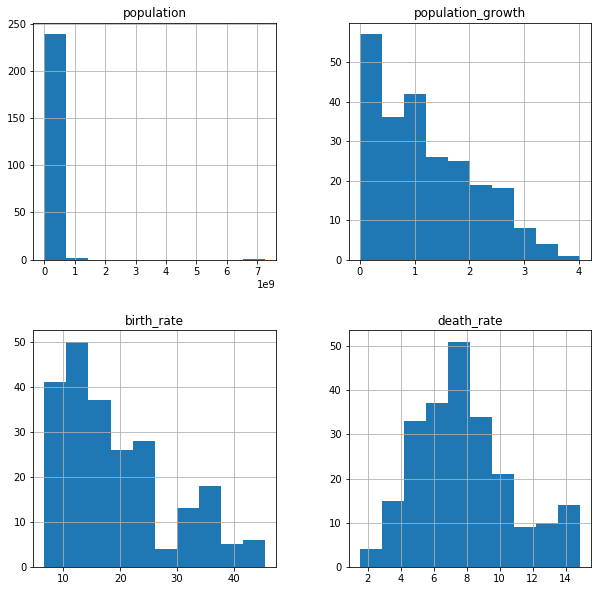

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
q6="SELECT population from facts"
pd.read_sql_query(q6,conn).hist(ax=ax1)
ax2 = fig.add_subplot(2,2,2)
q7="SELECT population_growth from facts"
pd.read_sql_query(q7,conn).hist(ax=ax2)
ax3 = fig.add_subplot(2,2,3)
q8="SELECT birth_rate from facts"
pd.read_sql_query(q8,conn).hist(ax=ax3)
ax4 = fig.add_subplot(2,2,4)
q9="SELECT death_rate from facts"
pd.read_sql_query(q9,conn).hist(ax=ax4)

### Countries having highest population density

In [10]:
query='''
SELECT name,population/area_land density
from facts
ORDER BY density desc
LIMIT 5
'''
pd.read_sql_query(query,conn)

,name,density
0,Macau,21168
1,Monaco,15267
2,Singapore,8259
3,Hong Kong,6655
4,Gaza Strip,5191


### countries with highest water to land ratios

In [13]:
query='''
SELECT name,area_water/area_land ratio
from facts
ORDER BY ratio desc
LIMIT 3
'''
pd.read_sql_query(query,conn)

,name,ratio
0,British Indian Ocean Territory,905
1,Virgin Islands,4
2,Afghanistan,0


### Countries with more water than land

In [16]:
query='''
SELECT name,area_water,area_land
from facts
where area_water>area_land
ORDER BY area_water desc
'''
pd.read_sql_query(query,conn)

,name,area_water,area_land
0,British Indian Ocean Territory,54340,60
1,Virgin Islands,1564,346
